<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


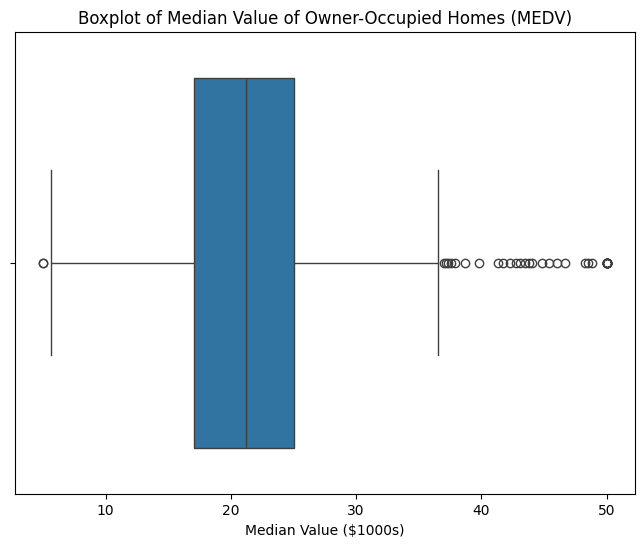

In [ ]:
#Boxplot figure
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.show()

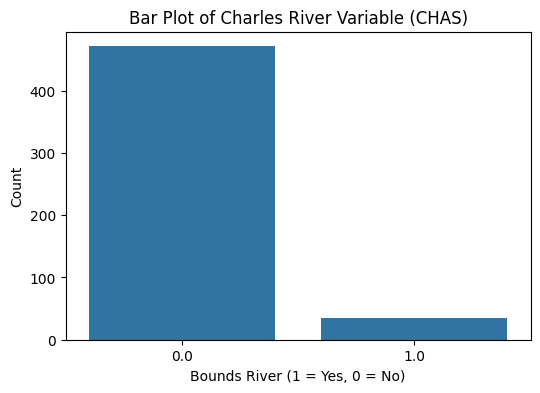

In [13]:
#bar plot for the Charles river variable
plt.figure(figsize=(6,4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Bounds River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

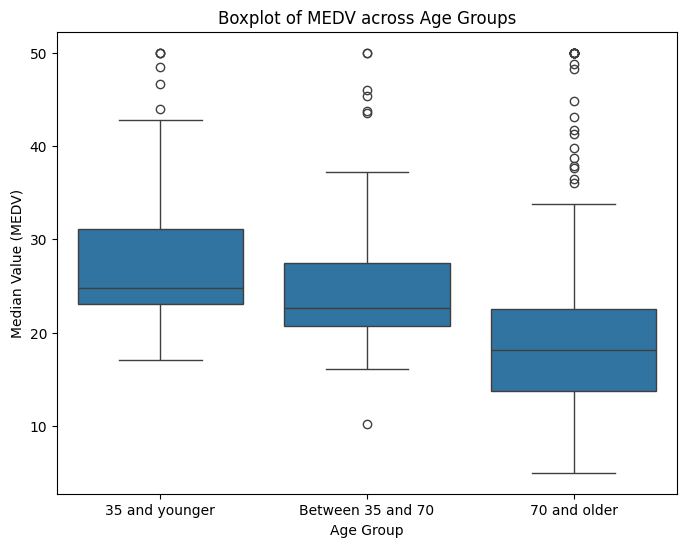

In [14]:
#Boxplot of MEDV vs Discretized AGE groups
# Create AGE groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', 'Between 35 and 70', '70 and older'])

# Now Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()

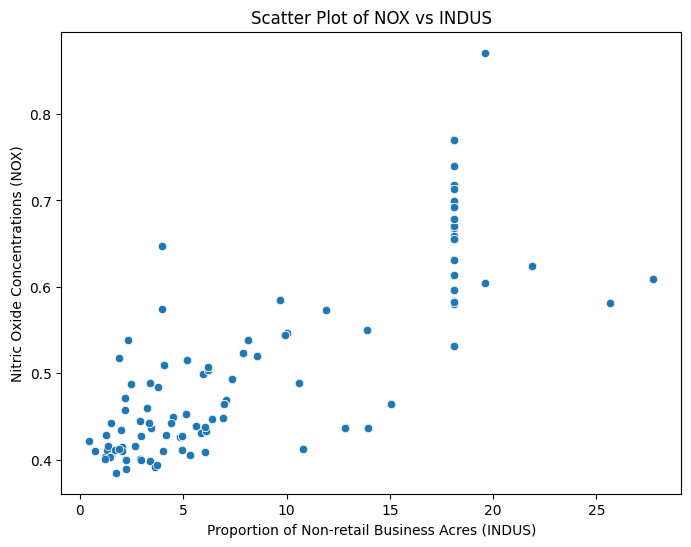

In [15]:
#Scatter Plot: Nitric Oxide Concentrations (NOX) vs Proportion of Non-retail Business Acres per Town (INDUS)
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()

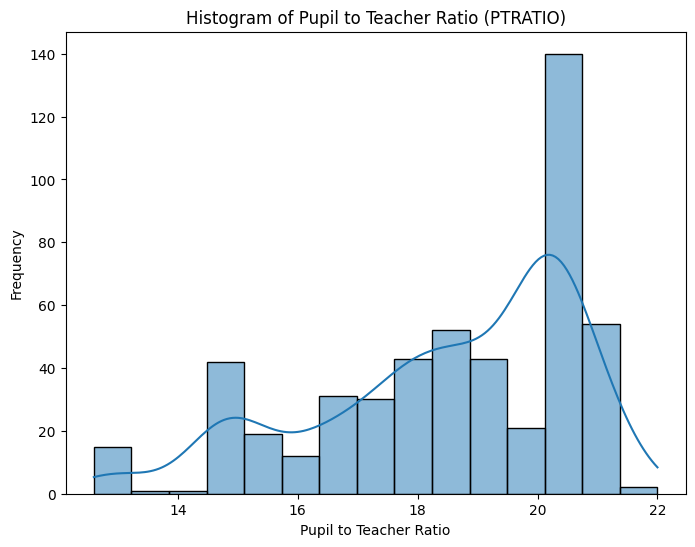

In [16]:
#Histogram for Pupil to Teacher Ratio (PTRATIO)
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

### 📝 Findings Summary:
In analyzing the Boston Housing dataset, several insights were revealed through descriptive statistics and visualizations:

 * The boxplot of the Median Value (MEDV) indicates the presence of outliers among high-value homes, with most properties valued between $20,000 and $25,000 (in $1000s).

 * The bar plot for the Charles River variable (CHAS) shows that the majority of the houses do not border the river (CHAS=0), with a much smaller number situated alongside it (CHAS=1).

 * The boxplot comparing MEDV across AGE groups reveals that newer homes (35 years or younger) tend to have higher median values compared to older properties, particularly those over 70 years old.

 * The scatter plot between NOX and INDUS shows a positive correlation: as the proportion of non-retail business acres (INDUS) increases, the Nitric Oxide concentration (NOX) also tends to rise, suggesting urban industrial areas may have higher pollution levels.

 * The histogram for PTRATIO (Pupil to Teacher Ratio) indicates that most towns have a pupil-teacher ratio between 17 and 20, with the distribution slightly skewed to the right.

These findings help us better understand the key factors influencing housing prices and neighborhood characteristics in the Boston area.

============================================

### 🧪 1. T-test: Difference in MEDV based on Charles River (CHAS)
Hypotheses:

H₀ (Null): There is no significant difference in median house value between houses near and not near Charles River.

H₁ (Alternative): There is a significant difference.

Test: Independent Samples T-test.

In [17]:
from scipy.stats import ttest_ind

# Split MEDV based on CHAS (1 or 0)
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(medv_river, medv_no_river)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 3.9964
P-value: 0.0001


✅ Interpretation (α = 0.05):

If p-value < 0.05 → reject H₀ → significant difference

If p-value ≥ 0.05 → fail to reject H₀ → no significant difference

### 🧪 2. ANOVA: Difference in MEDV across AGE Groups
Hypotheses:

H₀ (Null): The means of MEDV are equal across all AGE groups.

H₁ (Alternative): At least one group has a different mean.

Test: One-Way ANOVA.

In [ ]:
from scipy.stats import f_oneway

# Use the AGE groups we created earlier
group1 = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")